# Wektory

## Punkty i przestrzeń
__Punkty__ to po prostu lista liczb, która określa pozycję w przestrzeni wraz z jej __współrzędnymi__. Liczba współrzędnych określa liczbę __wymiarów__ tej przestrzeni. Jeśli nasza przestrzeń jest określona linią, wystarczy nam jedna współrzędna, aby określić jej położenie. Jeśli nasza przestrzeń jest zdefiniowana przez płaszczyznę, potrzebujemy tylko dwóch współrzędnych, a jeśli w 3D, potrzebujemy 3 współrzędnych. Ta logika może być zastosowana do dowolnej przestrzeni N-D, która dla dowolnego wymiaru większego niż 3 jest znana jako __hiperprzestrzeń__.


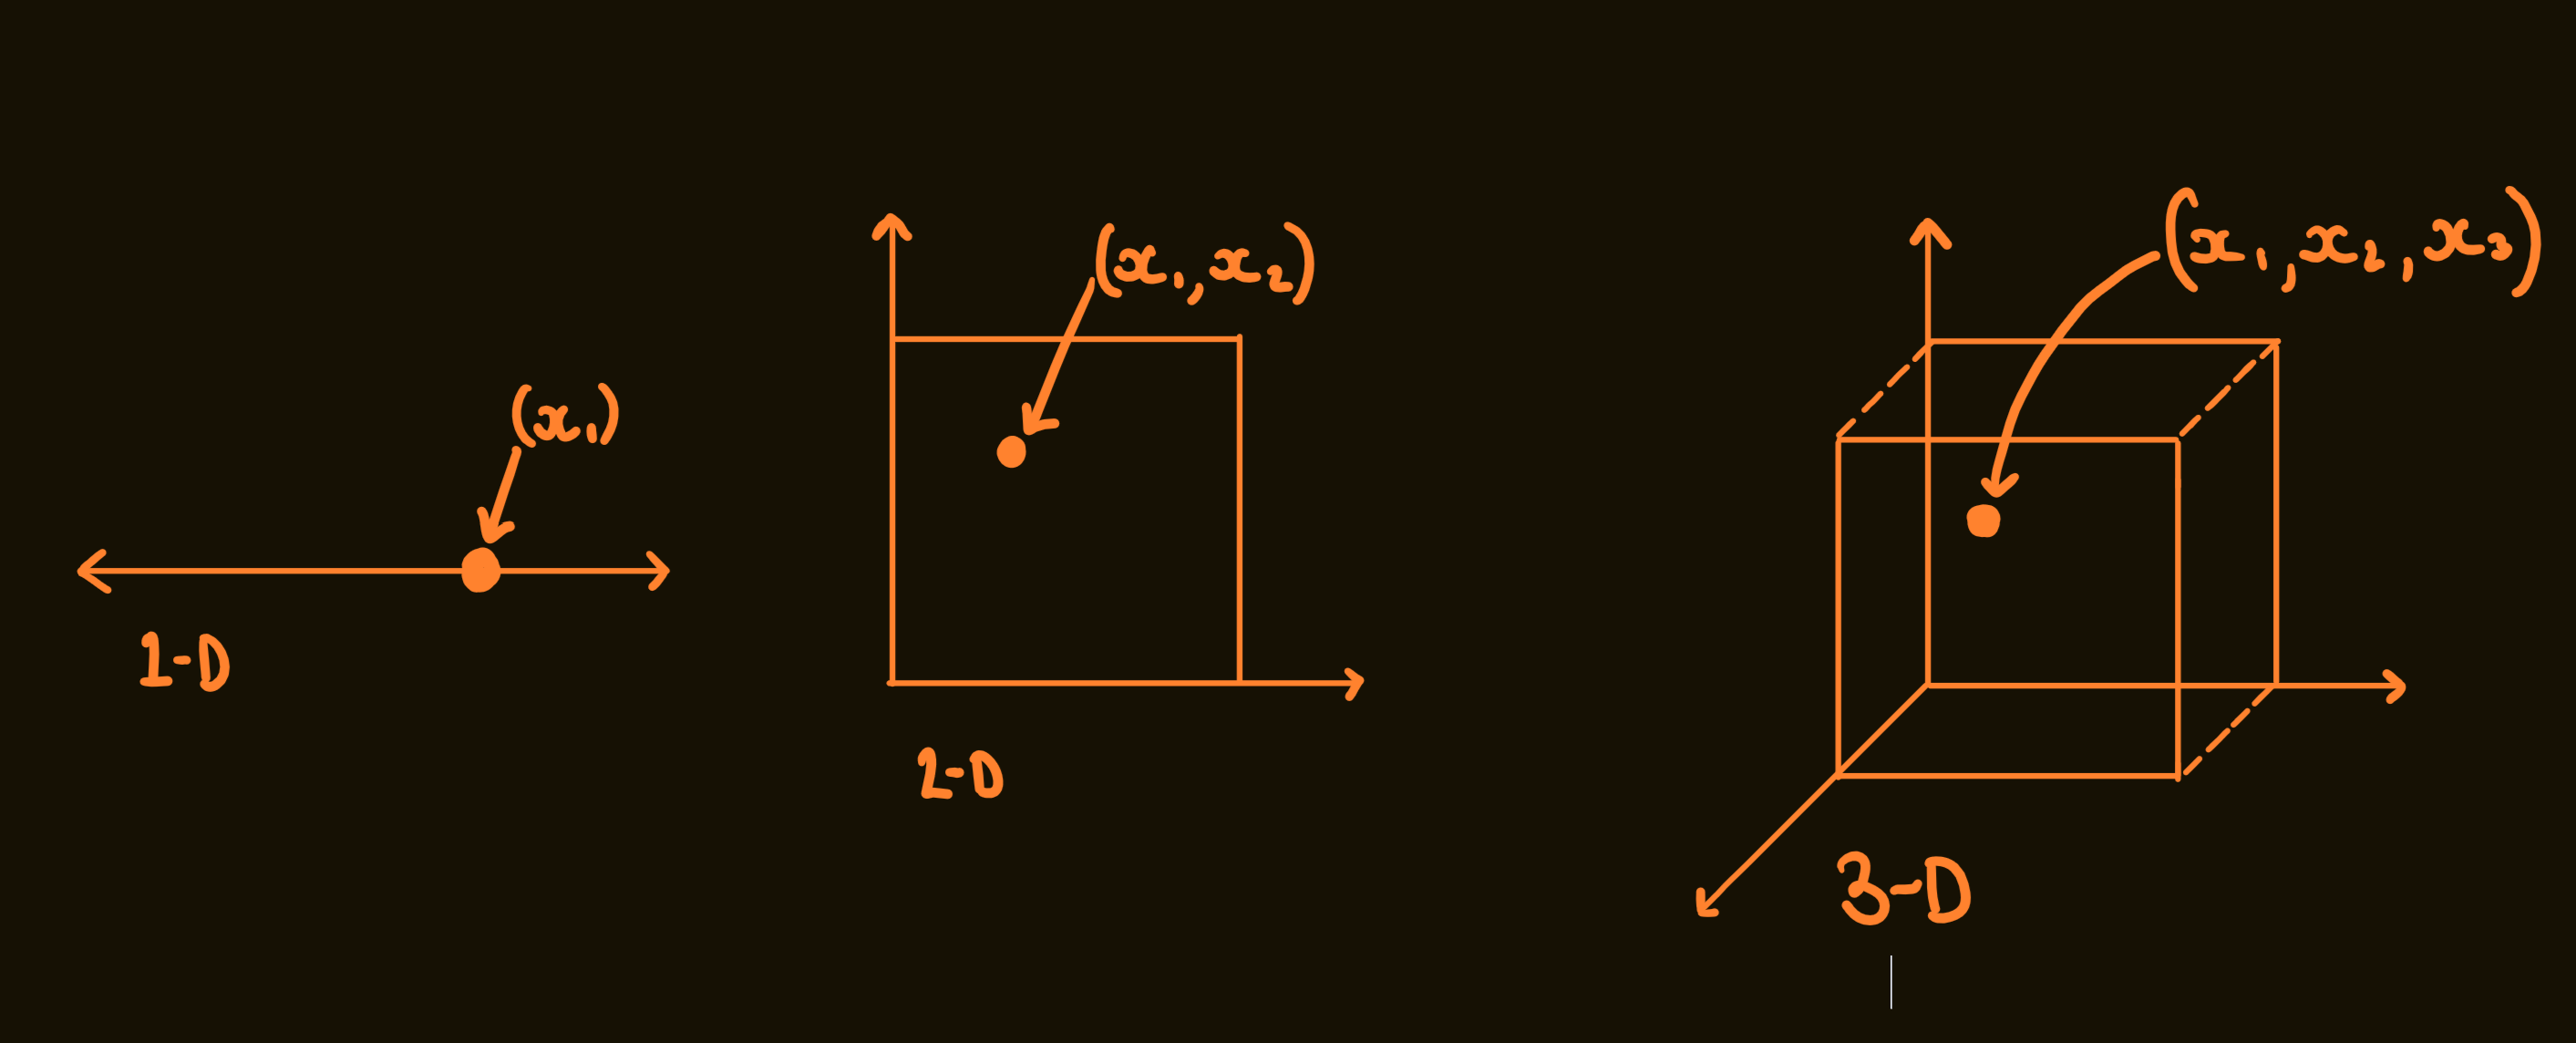

Czym więc są __wektory__? Wektory są użyteczną reprezentacją punktów w dowolnej przestrzeni N-D. Ogólnie rzecz biorąc, wektor to uporządkowana lista składająca się z __komponentów__, z których każdy może przyjmować zakres wartości, aby zdefiniować współrzędną wzdłuż danego wymiaru. Jest uporządkowany, ponieważ każdy  __element__ wektora odnosi się do współrzędnej wzdłuż określonego wymiaru.

W Pythonie możemy tworzyć wektory jako standardowe listy lub jako tablice NumPy.

In [ ]:
import numpy as np



Aby uzyskać pewną intuicję, rozważmy dwuwymiarową przestrzeń wektorową ze składowymi $x_{1}$ i $x_{2}$. Jeśli narysujemy to we współrzędnych kartezjańskich, możemy zwizualizować ten wektor jako instrukcję w postaci strzałki, aby przejść od początku (0,0) do wartości, które przyjmą nasze składowe. Rozważmy przykładowy wektor w tej przestrzeni, $\vec{\mathbf{v}}$. Wektory są zwykle oznaczane w kolumnach w następujący sposób:

$$\vec{\mathbf{v}} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$$

Ale może być również oznaczony w wierszach:

$$\vec{\mathbf{v}} = \begin{bmatrix} 1 & 2 \end{bmatrix}$$

W tym przypadku wektor każe nam przejść od (0,0) do (1,2). Obrazuje to poniższy wykres:

In [ ]:
# Wizualizacja

import plotly.graph_objects as go

x1 = [0,1]
x2 = [0,2]


fig = go.Figure(data=[go.Scatter(
    x=x1, y=x2,
    mode='markers',
    marker=dict(size=[10,50],
            color=["black","orange"])
    )])

fig.update_layout(
    title="Initial Vector Plot (v)",
    xaxis_title="$x_{1}$",
    yaxis_title="$x_{2}$",
)
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 2],marker_color="black"))
fig.update_layout(showlegend=False)
fig.show()

## Długość wektora
Innym powodem, dla którego często przydatna może być wizualizacja wektorów, tak jak to zrobiliśmy powyżej, jest to, że możemy bardziej intuicyjnie zrozumieć pojęcie __długości__ wektora, znanego również jako __wielkość__. Długość wektora jest miarą wielkości tego wektora i jest całkowicie niezależna od kierunku. Jeśli spojrzymy na przypadek wektora dwuwymiarowego $\mathbf{\vec{v}}$ pokazanego poniżej, z wyświetloną również jego długością wzdłuż każdego wymiaru. Widzimy, że tworzy trójkąt prostokątny, co oznacza, że możemy rozwiązać nasz problem za pomocą twierdzenia Pitagorasa!

In [ ]:
import plotly.graph_objects as go

x1 = [0,1,0,1]
x2 = [0,2,2,0]


fig = go.Figure(data=[go.Scatter(
    x=x1, y=x2,
    mode='markers',
    marker=dict(size=[50,50,25,25]),
    marker_color="orange")
])

fig.update_layout(
    title="Component-decomposed Vector (v)",
    xaxis_title="$x_{1}$",
    yaxis_title="$x_{2}$",
)
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 2],marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 0],marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 0], y=[0, 2],marker_color="black"))
# adding annotations
fig.add_annotation(
            x=0.5,
            y=0.6,
            text="$\sqrt{x_{1}^{2} + x_{2}^{2}}$")
fig.add_annotation(
            x=0.02,
            y=0.8,
            text="$x_{2}$")
fig.add_annotation(
            x=0.8,
            y=0.05,
            text="$x_{1}$")
fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=False,
            ax=0,
            ay=-40
))

fig.update_layout(showlegend=False)
fig.show()

Stąd długość wektora 2-D, który jest przeciwprostokątną powyższego trójkąta, dana jest poniższym równaniem:

$$||\vec{\mathbf{x}}|| = \sqrt{x_{1}^{2} + x_{2}^{2}}$$

Gdzie $||\vec{\mathbf{x}}||$ oznacza długość wektora $\vec{\mathbf{x}}$.

Oznacza to, że dla naszego przykładowego wektora $\vec{\mathbf{v}}$ otrzymujemy $||\vec{\mathbf{v}}|| = \sqrt{1^{2} + 2^{2}} = \sqrt{5}$. Jak więc rozszerzyć to na wyższe wymiary? Na szczęście matematycy pokazali, że dokładnie ten sam proces można zastosować dla dowolnej liczby wymiarów, aby uzyskać długość wektora, dając nam następujące równania:

$$\text{3-D Przypadek: }||\vec{\mathbf{x}}|| = \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}$$
$$\text{N-D Przypadek: }||\vec{\mathbf{x}}|| = \sqrt{\sum_{i=1}^{N} x_{i}^{2}} $$
($\sum$ to wielka grecka litera sigma i oznacza sumowanie)

Więc teraz, gdy mamy już matematyczne środki, jak możemy użyć Pythona do obliczenia długości wektora? Poniżej mamy trzy sposoby: podstawowe programowanie, ze standardową biblioteką Pythona i NumPy. Zauważ, że w przypadku programowania podstawowego, powszechną zasadą jest to, że __sumowanie wielu terminów implikuje użycie iteracji__, ponieważ jest to powtarzalne zadanie.

In [ ]:
import numpy as np

In [ ]:
import math

# Example vector
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Standard Python


# Math module


# NumPy


## Dodawanie i odejmowanie wektorów
Powiedzmy teraz, że mamy dwa wektory na tej samej przestrzeni wektorowej. Możemy teraz wykonywać operacje takie jak __dodawanie wektorów__ i __odejmowanie wektorów__. Co to znaczy? Możemy lepiej je zwizualizować na płaszczyźnie 2D. Aby wykonać te operacje, po prostu __dodajemy__ lub __odejmujemy__ składniki wektorów odpowiednio, jak pokazano w poniższych równaniach:

$$ \vec{\mathbf{x}}+\vec{\mathbf{y}} = \begin{bmatrix} x_{1}+y_{1} \\ x_{2}+y_{2} \end{bmatrix}$$

$$ \vec{\mathbf{x}}-\vec{\mathbf{y}} = \begin{bmatrix} x_{1}-y_{1} \\ x_{2}-y_{2} \end{bmatrix}$$

Możemy sobie wyobrazić dodanie dwóch wektorów jako następujące po „ruchu” pierwszego wektora, a następnie po „ruchu” drugiego wektora i zobaczenie, gdzie się znajdujemy! Widzimy to poniżej:

$$\begin{bmatrix} 3 \\ 3 \end{bmatrix} + \begin{bmatrix} 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 5 \\ 4 \end{bmatrix}$$

In [ ]:
x1 = [0,3,2,5]
x2 = [0,3,1,4]


fig = go.Figure(data=[go.Scatter(
    x=x1, y=x2,
    mode='markers',
    marker = dict(size=[10,30,30,60],
                  color=["black","orange","orange","orange"]),
    )
])

fig.update_layout(
    title="Vector Addition",
    xaxis_title="$x_{1}$",
    yaxis_title="$x_{2}$",
)
fig.add_trace(go.Scatter(x=[0, 3], y=[0, 3],marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 2], y=[0, 1],marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 5], y=[0, 4],marker_color="black"))
# adding annotations
fig.add_annotation(
            x=1,
            y=0.3,
            text="$\mathbf{y}$")
fig.add_annotation(
            x=1.5,
            y=1.8,
            text="$\mathbf{x}$")
fig.add_annotation(
            x=3,
            y=2.5,
            text="$\mathbf{x+y}$")
fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=False,
            ax=0,
            ay=-40
))

fig.update_layout(showlegend=False)
fig.show()

W przypadku odejmowania możemy sobie wyobrazić ten sam proces, ale poruszający się w kierunku przeciwnym do wektora, przez który odejmujemy. Przykład odejmowania pokazano poniżej:

$$\begin{bmatrix} 5 \\ 4 \end{bmatrix} - \begin{bmatrix} 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$$

Ta sama intuicja rozciąga się na wyższe przestrzenie wektorowe. Teraz, gdy mamy już intuicję, obliczymy dodawanie/odejmowanie wektorów za pomocą standardowego Pythona i NumPy poniżej.

In [ ]:
# Przykładowe wektory
vector1 = [1,2,3,4,5,6,7,8,9,10]
vector2 = [1,1,1,1,1,1,1,1,1,1]



# NumPy


vector1 + vector2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
vector1 - vector2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

vector1 + vector2 = [ 2  3  4  5  6  7  8  9 10 11]
vector1 - vector2 = [0 1 2 3 4 5 6 7 8 9]


## Mnożenie wektorów

### Mnożenie przez skalar

Oprócz dodawania i odejmowania na wektorach można stosować inne operacje. Jedna z popularnych aplikacji jest znana jako __mnożenie przez skalar__. __Skalar__ to wielkość niewektorowa, zazwyczaj jest to liczba. Mnożenie przez skalar oznacza, że mnożąc wektor przez liczbę (skalar), mnożymy każdą wartość w wektorze przez wspomniany skalar. Jest to pokazane dla poniższego przypadku 2-D, przy danej wielkości skalarnej a:
$$a\vec{\mathbf{x}} = a\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = \begin{bmatrix} ax_{1} \\ ax_{2} \end{bmatrix}$$

Warto wspomnieć, że skalowanie wektora zmienia tylko jego długość, ale nie kierunek w przestrzeni, ponieważ wszystkie komponenty są skalowane proporcjonalnie. W ten sposób możemy __normalizować__ wektor, aby uzyskać jego __wektor jednostkowy($\hat{x}$)__, zdefiniowany jako wektor o tym samym kierunku co wektor oryginalny, ale o długości/wielkości równej 1. Jest to pokazane dla ogólnego przypadku 2D poniżej.

$$\hat{\mathbf{x}} = \frac{1}{||\vec{\mathbf{x}}||}\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} =
\begin{bmatrix} \frac{x_{1}}{\sqrt{x_{1}^{2} + x_{2}^{2}}} \\ \frac{x_{2}}{\sqrt{x_{1}^{2} + x_{2}^{2}}} \end{bmatrix}$$

Jest to bardziej widoczne na przykładzie poprzedniego wektora $\mathbf{\vec{v}}$, zobrazowanego na diagramie poniżej:

In [ ]:
# komponenty wektora
x1 = [0,0,0,1,math.sqrt(0.5),1,math.sqrt(0.5)]
x2 = [0,1,math.sqrt(0.5),0,0,1,math.sqrt(0.5)]


fig = go.Figure(data=[go.Scatter(
    x=x1, y=x2,
    mode='markers',
    marker = dict(size=[10,50,25,50,25,50,25],
                  color=["black","orange","orange","orange","orange","orange","orange"]),
    )
])

fig.update_layout(
    title="Normalization",
    xaxis_title="$x_{1}$",
    yaxis_title="$x_{2}$",
)
fig.add_trace(go.Scatter(x=[0, 0], y=[0, 1], marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 0], marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], marker_color="black"))
# adding annotations
fig.add_annotation(
            x=0.9,
            y=1,
            text="$\mathbf{v}$")
fig.add_annotation(
            x=0.62,
            y=0.72,
            text="$\mathbf{\hat{v}}$")
fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=False,
            ax=0,
            ay=-40
))

fig.update_layout(showlegend=False)
fig.show()

Poniżej liczenie skalarnej wielokrotności wektora w NumPy.

In [ ]:
# Defining our vector and our scalar
a = 3
vector = np.array([1,2,3,4,5,6,7,8,9,10])


### Iloczyn skalarny wektora

Inną kluczową formą mnożenia wektorów jest tak zwany __iloczyn skalarny__. Jest on definiowany jako iloczyn rzutu pierwszego wektora na drugi wektor i wielkości drugiego wektora. Istnieją dwa sposoby obliczania iloczynu skalarnego dwóch wektorów. Dla dowolnych dwóch wektorów o równym wymiarze, $\mathbf{\vec{x}}$ i $\mathbf{\vec{y}}$, definicja algebraiczna jest dana wzorem:

$$ \text{2-D Case: } \langle \mathbf{\vec{x}},\mathbf{\vec{y}} \rangle =\mathbf{\vec{x}}\cdot \mathbf{\vec{y}} = x_{1}y_{1} + x_{2}y_{2} $$
$$ \text{N-D Case: } \langle \mathbf{\vec{x}},\mathbf{\vec{y}} \rangle =\mathbf{\vec{x}}\cdot \mathbf{\vec{y}} = \sum_{i=1}^{N}x_{i}y_{i} $$


Z tej definicji widzimy, że ponieważ komponenty w tym samym wymiarze są mnożone razem. Jeśli są jednocześnie duże i dodatnie, iloczyn również będzie duży. Jeśli jeden jest duży, a drugi mały, iloczyn nie będzie tak duży. Jeśli wartości mają przeciwne znaki, iloczyn będzie ujemny. Dlatego możemy już rozwinąć intuicję na temat wyniku iloczynu skalarnego:
- Im więcej dwóch wektorów znajduje się w _tym samym_ kierunku, tym większy będzie ich iloczyn skalarny
- Im więcej dwóch wektorów jest w _przeciwnych_ kierunku, tym bardziej ujemny będzie ich iloczyn skalarny

Oznacza to, że iloczyn skalarny jest miarą dopasowania dwóch wektorów, proporcjonalnie do ich odpowiednich wielkości. Niektóre wektory nie mają jednak możliwości wyrównania i są znane jako __wektory ortogonalne__. Ponieważ nie ma wyrównania, iloczyn skalarny wektorów ortogonalnych jest zawsze równy 0, bez względu na ich odpowiednie wielkości.

In [ ]:
# Vector components
x1 = [0,0,1]
x2 = [0,1,0]

fig = go.Figure(data=[go.Scatter(
    x=x1, y=x2,
    mode='markers',
    marker = dict(size=[10,50,50],
                  color=["black","orange","orange"]),
    )
])

fig.update_layout(
    title="Orthogonal Vectors",
    xaxis_title="$x_{1}$",
    yaxis_title="$x_{2}$",
)
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 0], marker_color="black"))
fig.add_trace(go.Scatter(x=[0, 0], y=[0, 1], marker_color="black"))

fig.update_layout(showlegend=False)
fig.show()

Co dokładnie oznaczają __wektory ortogonalne__? Ponieważ iloczyn skalarny wynosi 0, rzut jednego wektora na drugi wynosi zero. Rozważ podróżnika przemierzającego pustynię, który podąża za mapą, aby dotrzeć do najbliższego miasta idąc na południowy wschód. Po zapoznaniu się trochę z wektorami będziesz już w stanie stwierdzić, że podróżowanie w kierunku południowo-wschodnim można podzielić na składową „południową” i składową „wschodnią”, więc projekcja tego, ile podróżny przeszedł w kierunku południowym oznacza, jak daleko na południe zaszedł podróżny.

Ale co, jeśli zda sobie sprawę, że nie musi jechać na wschód, i podróżuje tylko w kierunku „południowym”. Ile przebył w kierunku „wschodu” lub „zachodu”? Nic! Może wiecznie podróżować w kierunku „południowym”, ale to nigdy nie przyczyni się do jego odległości na „wschód”, ponieważ „wschód” i „południe” są ortogonalne!

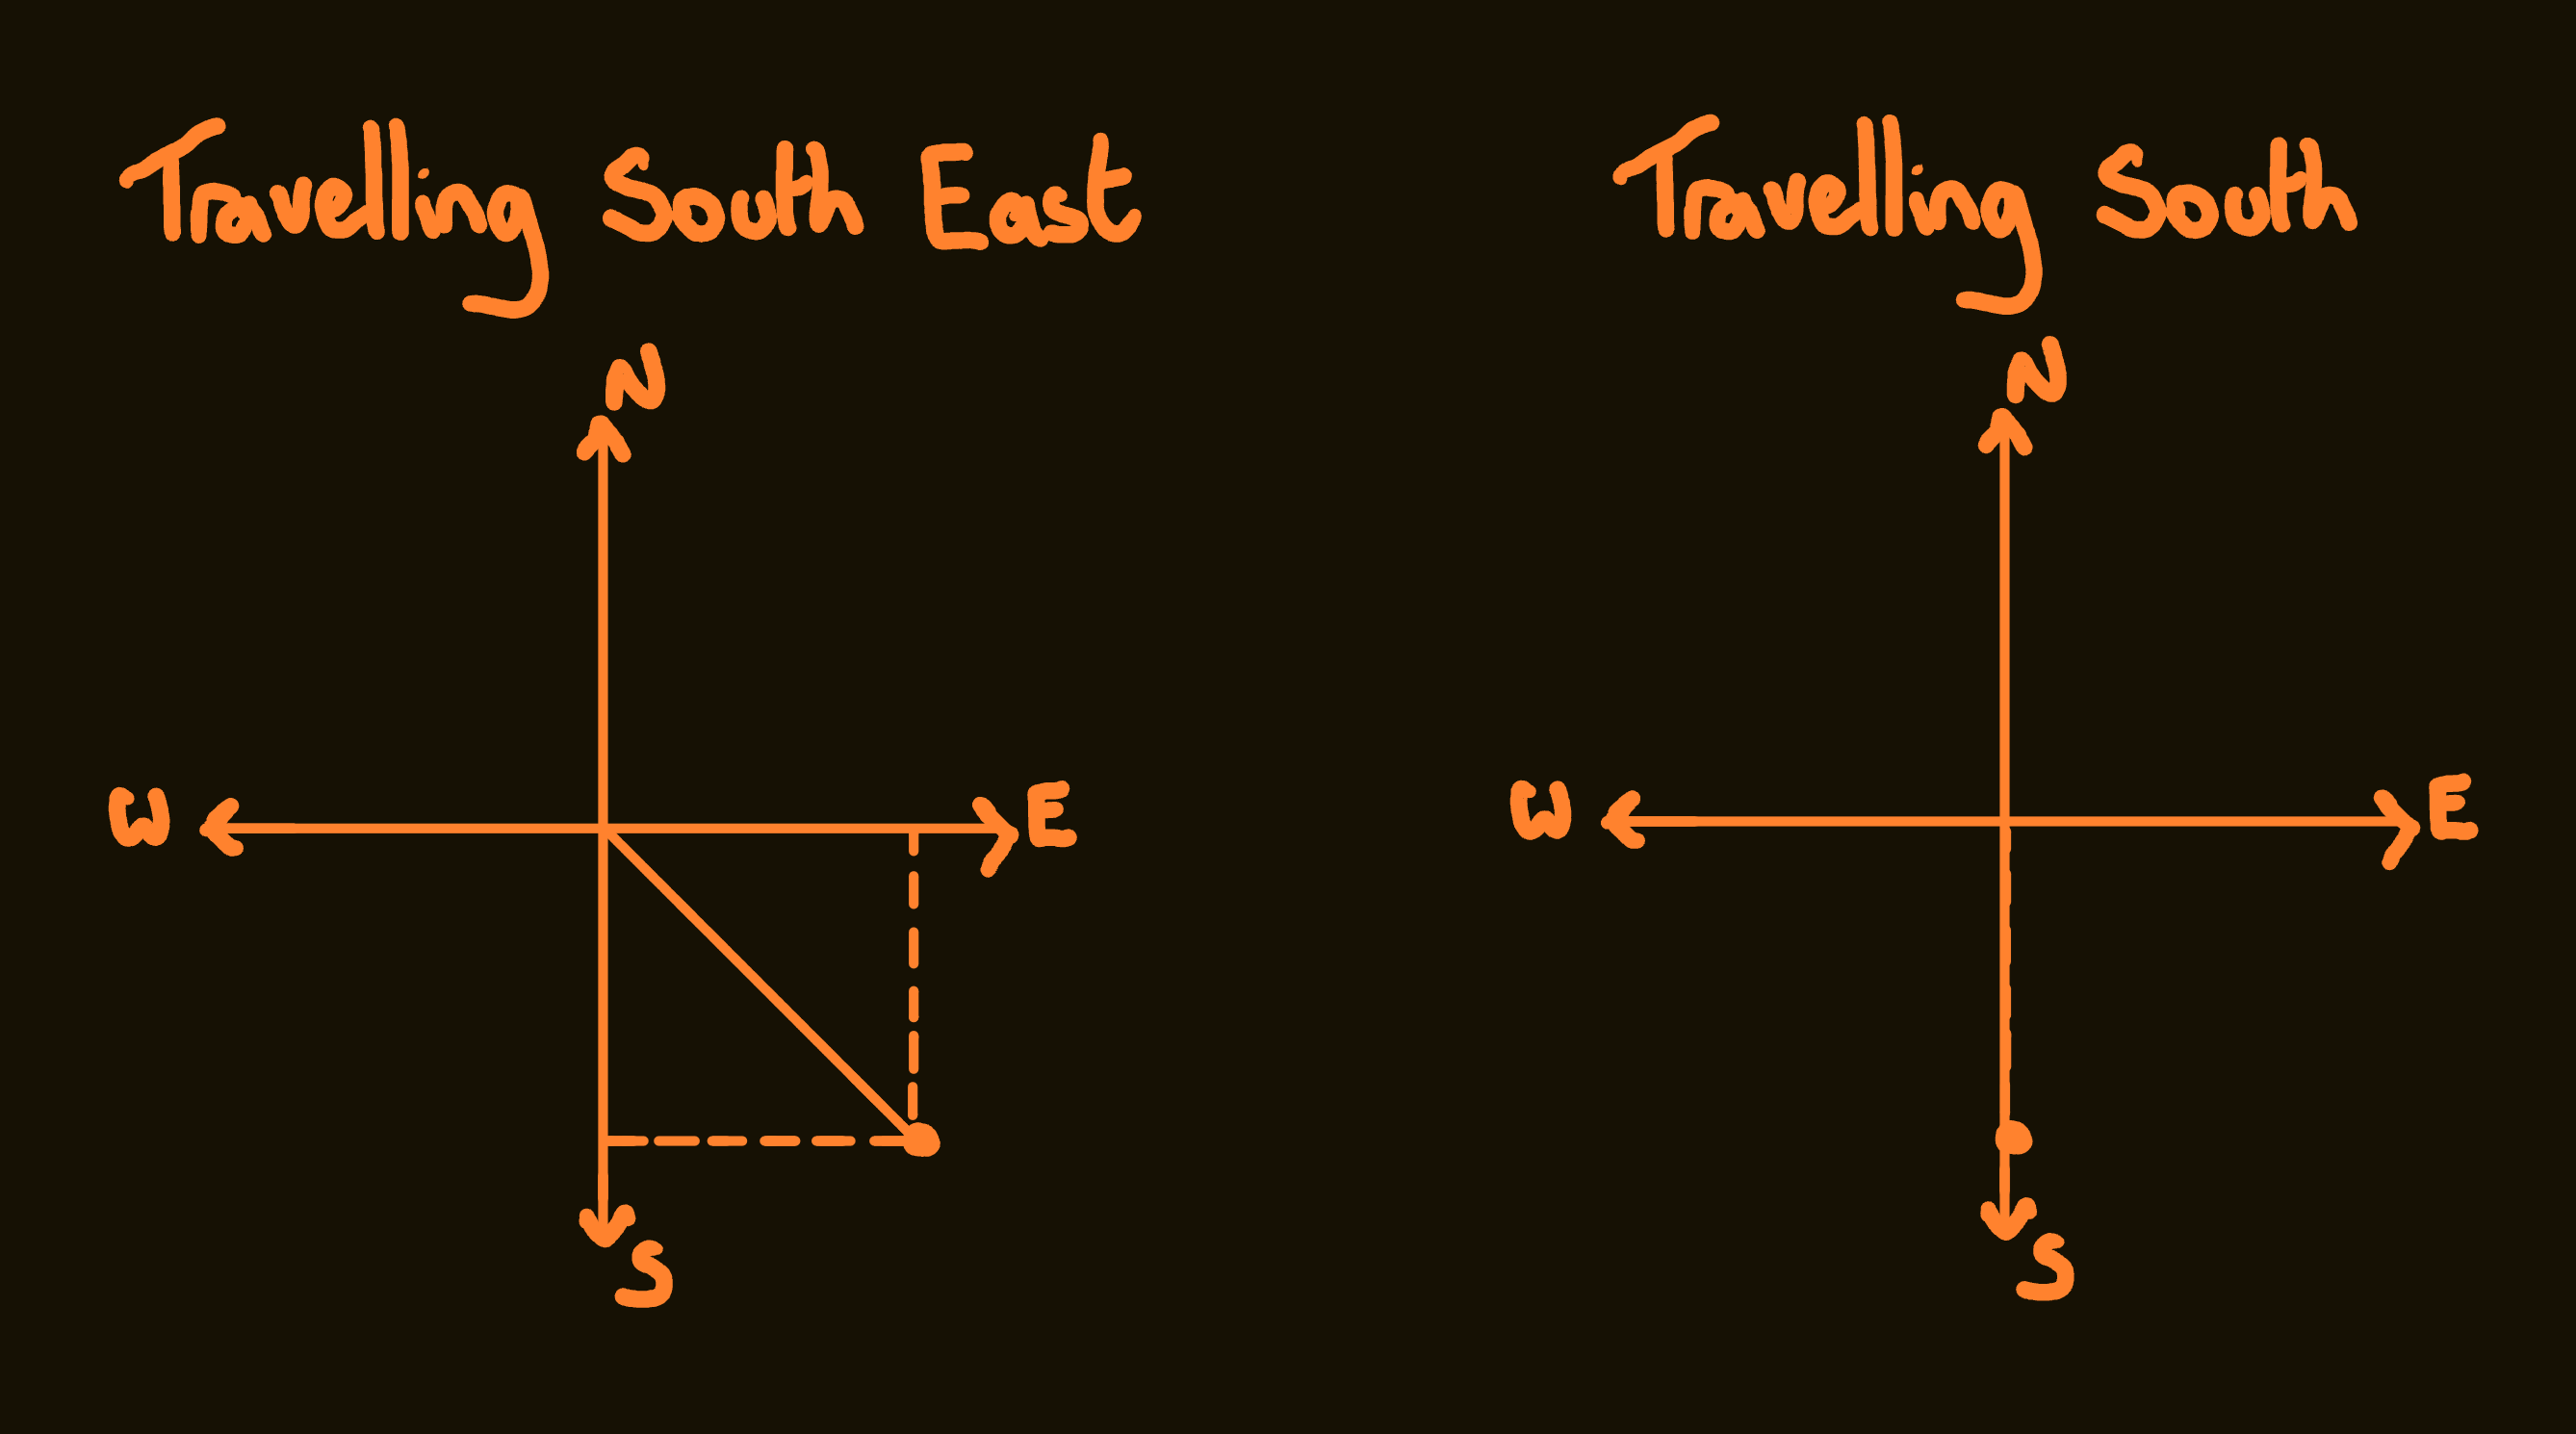

Ta intuicja nadal odnosi się do każdego wektora N-D! Jeśli para/zbiór wektorów ortogonalnych również ma długość jednostkową, są one dalej klasyfikowane jako __wektory ortonormalne__. Zobaczymy teraz, jak obliczyć, zarówno w standardowym Pythonie, jak i NumPy, iloczyn skalarny tych wektorów:

In [ ]:
# Defining our vectors
vector1 = [1,2,3,4,5,6,7,8,9,10]
orthogonal_vector = [-2,-2,-2,-2,0,0,0,0,0,2]

# Standard Python

# Displaying our results



# NumPy


### Iloczyn uwzględniający elementy (Iloczyn Hadamarda)
Chociaż mniej powszechnie stosowana w przypadku wektorów, inną formą mnożenia wektorów jest __Iloczyn Hadamarda__. Zastosowanie tej operacji do dwóch wektorów zwraca inny wektor o tym samym wymiarze, gdzie każdy wpis jest iloczynem odpowiednich wpisów wektorów wejściowych, jak pokazano poniżej dla wektora N-D:

$$\vec{\mathbf{x}} \circ \vec{\mathbf{y}} = \begin{bmatrix} x_{1}y_{1} \\ x_{2}y_{2}\\ \vdots \\x_{N}y_{N} \end{bmatrix} $$

Poniżej obliczenia w Pythonie i NumPy:

In [ ]:
# initialising our vectors
vector1 = [1,2,3,4,5,6,7,8,9,10]
vector2 = [1,2,3,4,5,6,7,8,9,10]


# Standard Python



# NumPy
print("NumPy element-wise product:",np.multiply(vector1,vector2))